In [4]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [5]:
#Importing the dataset
data = pd.read_csv("D:\\SLIIT\\3rd year 2nd sem\\Machine Learning amd Optimization Methods\\Coding\\petrol_consumption.csv")
data.head(10)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410
5,10.0,5342,1333,0.571,457
6,8.0,5319,11868,0.451,344
7,8.0,5126,2138,0.553,467
8,8.0,4447,8577,0.529,464
9,7.0,4512,8507,0.552,498


In [6]:
data.shape

(48, 5)

In [7]:
#Exploring the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.668333,0.950770,5.000,7.00000,7.5000,8.12500,10.000
Average_income,48.0,4241.833333,573.623768,3063.000,3739.00000,4298.0000,4578.75000,5342.000
Paved_Highways,48.0,5565.416667,3491.507166,431.000,3110.25000,4735.5000,7156.00000,17782.000
Population_Driver_licence(%),48.0,0.570333,0.055470,0.451,0.52975,0.5645,0.59525,0.724
Petrol_Consumption,48.0,576.770833,111.885816,344.000,509.50000,568.5000,632.75000,968.000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [9]:
data.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

* **regplot()** function plot data and a linear regression model fit.

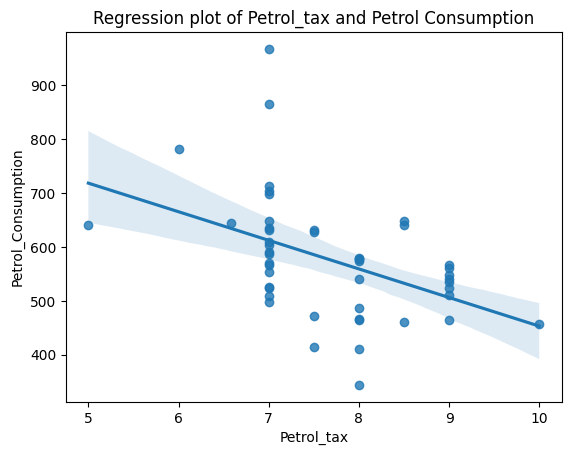

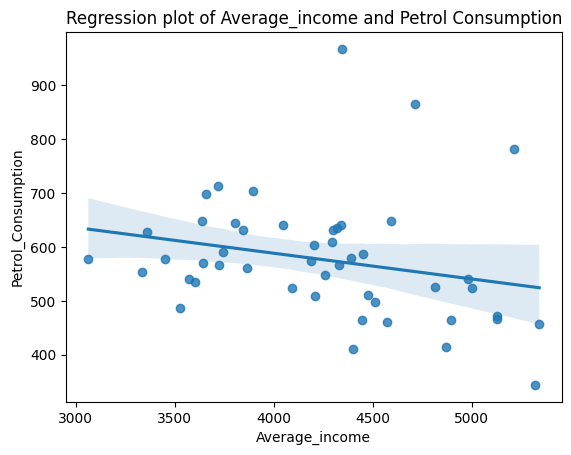

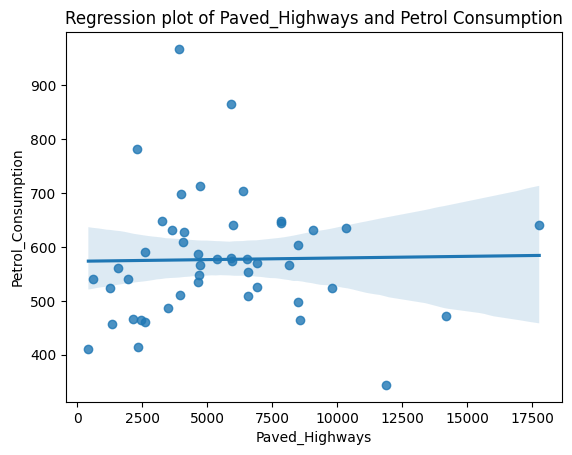

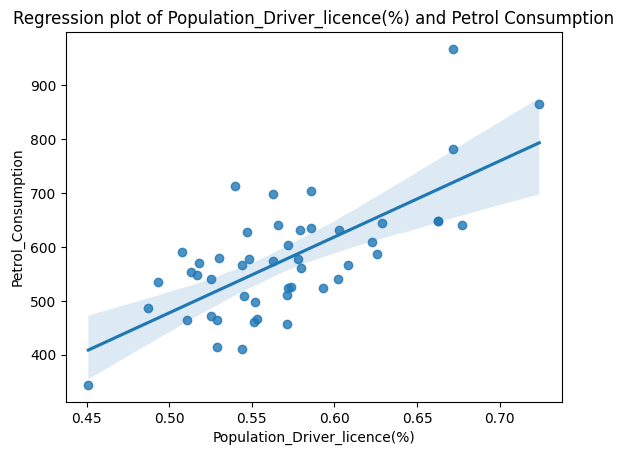

In [10]:
variables=['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)']

for var in variables:
    plt.figure() #Creating a rectangle(figure) for each plot.
    sns.regplot(x=var,y='Petrol_Consumption',data=data).set(title=f'Regression plot of {var} and Petrol Consumption')

In [12]:
#Calculating the correlation
correlations = data.corr()
correlations

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


[Text(0.5, 1.0, 'Heatmap of consumption data-Pearson Correlations')]

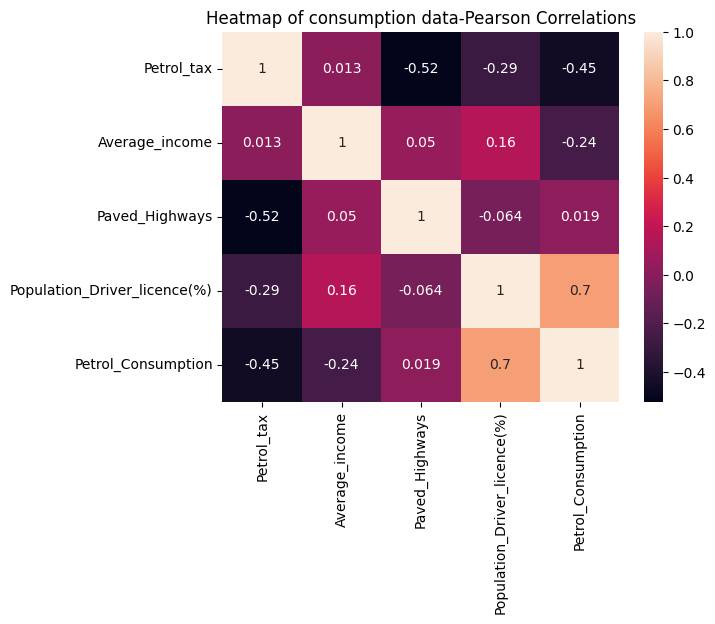

In [13]:
#annot=True displays the correlation values
sns.heatmap(correlations,annot=True).set(title='Heatmap of consumption data-Pearson Correlations')

In [14]:
y=data['Petrol_Consumption']
y

0     541
1     524
2     561
3     414
4     410
5     457
6     344
7     467
8     464
9     498
10    580
11    471
12    525
13    508
14    566
15    635
16    603
17    714
18    865
19    640
20    649
21    540
22    464
23    547
24    460
25    566
26    577
27    631
28    574
29    534
30    571
31    554
32    577
33    628
34    487
35    644
36    640
37    704
38    648
39    968
40    587
41    699
42    632
43    591
44    782
45    510
46    610
47    524
Name: Petrol_Consumption, dtype: int64

In [15]:
x=data[['Average_income','Paved_Highways','Population_Driver_licence(%)','Petrol_tax']]
x

,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_tax
0,3571,1976,0.525,9.00
1,4092,1250,0.572,9.00
2,3865,1586,0.580,9.00
3,4870,2351,0.529,7.50
4,4399,431,0.544,8.00
5,5342,1333,0.571,10.00
6,5319,11868,0.451,8.00
7,5126,2138,0.553,8.00
8,4447,8577,0.529,8.00
9,4512,8507,0.552,7.00


In [16]:
#Splitting the dataset into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
x.shape

(48, 4)

In [18]:
#Creating the model
regressor = LinearRegression()

In [19]:
#Training the model
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [20]:
regressor.intercept_

361.4508790666835

In [21]:
regressor.coef_

array([-5.65355145e-02, -4.38217137e-03,  1.34686930e+03, -3.69937459e+01])

In [23]:
feature_names = x.columns
feature_names

Index(['Average_income', 'Paved_Highways', 'Population_Driver_licence(%)',
       'Petrol_tax'],
      dtype='object')

In [25]:
model_coefficients = regressor.coef_
coefficients_data = pd.DataFrame(data=model_coefficients,index=feature_names,columns=['Coefficient value'])
coefficients_data

,Coefficient value
Average_income,-0.056536
Paved_Highways,-0.004382
Population_Driver_licence(%),1346.869298
Petrol_tax,-36.993746


In [26]:
#Making predictions
y_pred = regressor.predict(x_test)
y_pred

array([606.69266519, 673.77944169, 584.99149034, 563.53691024,
       519.05867235, 643.46100256, 572.89761422, 687.07703573,
       547.6093662 , 530.03762971])

In [28]:
results = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
results

,Actual,Predicted
27,631,606.692665
40,587,673.779442
26,577,584.991490
43,591,563.536910
24,460,519.058672
37,704,643.461003
12,525,572.897614
19,640,687.077036
4,410,547.609366
25,566,530.037630


In [31]:
#Calculating the model accuracy
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)

print(f'Mean absolute error:{mae:.5f}')
print(f'Mean squared error:{mse:.5f}')
print(f'Root mean squared error:{rmse:.5f}')

Mean absolute error:53.46854
Mean squared error:4083.25587
Root mean squared error:63.90036


In [37]:
regressor.score(x_test,y_test)

0.391366400143053

In [38]:
regressor.score(x_train,y_train)

0.7068781342155137

* The above outputs show that the model accuracy for testing the data is very low and accuracy for training data is very high which is a cause of overfitting the data.

* Factors that may have been contributed for overfitting of data is:
1. Not enough data.
2. Overcome overfitting
3. Assumptions that don't hold
4. Poor features